<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/11_CNN_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor란?

Tensor : 배열
* 배열인데 Rank 시스템이 있다.
* 0 Rank Tensor - Scalar
* 1 Rank Tensor - Array(Vector) - 1차원 배열
* 2 Rank Tensor - Matrix - 행렬
* 3 Rank Tensor - 3차원 배열
* 4 Rank Tensor - 4차원 배열

# Tensorflow는?
* Tensor가 흘러다니는 **계산그래프**를 미리 만들어 놓고 Tensor를 훈련시에 흘려(Flow)보낸다.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# 각종 시퀀스들을 Tensor로 변환이 가능하다.

# 1. list -> tensor
tf.constant([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
# 2. tuple -> tensor
tf.constant((1, 2, 3))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
# 3. ndarray -> tensor
arr = np.array([1, 2, 3])
tf.constant(arr)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

# Tensor 정보 확인하기

In [ ]:
tensor = tf.constant([1, 2, 3])
tensor.shape

TensorShape([3])

In [ ]:
tensor.dtype # 데이터 타입

tf.int32

In [ ]:
tensor = tf.constant(np.random.randn(2, 3))
tensor.dtype

tf.float64

In [ ]:
# 텐서를 구성하는 원소 중 데이터 타입이 가장 큰 것이 텐서의 데이터 타입이 된다.
# 예를 들어 텐서에 정수와 실수가 섞여져 있으면 텐서의 타입은 실수가 된다.

tensor = tf.constant([1, 2.1, 3])
tensor.dtype

tf.float32

In [ ]:
# 텐서를 만들 때 데이터 타입을 지정
tensor = tf.constant([1, 2, 3], dtype=tf.float32)
tensor.shape

TensorShape([3])

In [ ]:
tensor.dtype

tf.float32

In [ ]:
# tf.cast 를 활용해서 텐서의 타입을 변경
tf.cast(tensor, tf.int32).dtype

tf.int32

In [ ]:
# numpy, tensorflow는 상호간에 호환이 가능
# 1. tensor를 ndarray로 바꿔보기
tensor.numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
# 2. np.array를 이용해서 tensor를 ndarray로 바꿀 수 있다.
np.array(tensor)

array([1., 2., 3.], dtype=float32)

# Tensorflow의 난수 생성

In [ ]:
# numpy로 정규분포 난수 생성하기
np.random.randn(9)

array([ 0.497915  , -0.14458704,  0.46473898,  0.32639101, -0.48926386,
       -1.3619899 ,  2.29910261, -1.58208874, -0.77126096])

In [ ]:
# tensorflow로 정규분포 난수 생성하기
tf.random.normal((3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.8549297 ,  0.59345984, -0.8717115 ],
       [-0.22827858,  1.1352422 ,  1.1079745 ],
       [ 1.8956741 ,  1.0118338 , -0.8103193 ]], dtype=float32)>

In [ ]:
# tensorflow로 균등분포 난수 생성하기
tf.random.uniform((3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[5.2254391e-01, 9.0136385e-01, 5.8752489e-01],
       [9.0100038e-01, 7.5068498e-01, 6.9210362e-01],
       [8.7932229e-01, 1.7571449e-04, 9.3903482e-01]], dtype=float32)>

# Tensorflow의 keras를 활용해서 MNIST 분류기 만들어 보기

In [ ]:
import tensorflow as tf

# keras에 필요한 레이어가 다 준비가 되어 있어요. 갖다가 쓰기만 하면 된다.
from tensorflow.keras.layers import Dense, Flatten

# 레이어를 묶어 놓을 모델이 있어어 함
from tensorflow.keras.models import Sequential

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 이미지 정규화 -  / 255.0
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [ ]:
# 케라스의 Sequential 모델을 사용하여 모델링 하기

# Dense레이어를 이용해서 Fully Connected Layer 구축
#  데이터가 어쨋든간에 평탄화가 되어야 한다. -> Flatten 레이어를 사용

num_classes = 10

model = Sequential([
  Flatten(input_shape=(28, 28)), # 평탄화 레이어. 항상 첫 번째 레이어는 input_shape을 지정해야 합니다.(배치를 제외한)
  # Fully Connected Layer 설정하기( Dense )
  Dense(512, activation='relu'), # 은닉 1층
  Dense(256, activation='relu'), # 은닉 2층
  Dense(128, activation='relu'), # 은닉 3층

  Dense(num_classes, activation='softmax') # 출력층의 활성화 함수는 softmax
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(60000,)

In [ ]:
# 학습을 하기위해서 모델에 대한 최적화 기법, loss 선정, 평가 기준
model.compile(
    optimizer="adam",  # 최적화 기법
    loss="sparse_categorical_crossentropy", # 다중 분류, OHE 안되어있을 때 쓴다.
    metrics=["acc"]
)

In [ ]:
# 훈련 시작
model.fit(X_train,
          y_train,
          validation_split=0.2, # 훈련 데이터의 20%를 검증용 데이터로 사용하겠다.
          epochs=20, # 에폭 횟수
          batch_size=32
          )

Epoch 1/20
1500/1500 [==============================] - 5s 2ms/step - loss: 0.3749 - acc: 0.8834 - val_loss: 0.1198 - val_acc: 0.9626
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0911 - acc: 0.9711 - val_loss: 0.1015 - val_acc: 0.9703
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0628 - acc: 0.9802 - val_loss: 0.1094 - val_acc: 0.9692
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0459 - acc: 0.9861 - val_loss: 0.1115 - val_acc: 0.9706
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.1115 - val_acc: 0.9712
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0319 - acc: 0.9906 - val_loss: 0.0851 - val_acc: 0.9797
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0266 - acc: 0.9917 - val_loss: 0.0936 - val_acc: 0.9767
Epoch 8/20
1500/1500 [==============================] - 3s 2ms

# CNN 구축하기

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [ ]:
# 이미지를 가져왔으니까 시각화 해보고, 형상(shape) 확인하기
image = X_train[0]
image.shape

(28, 28)

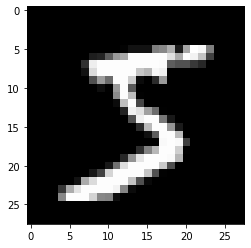

In [ ]:
plt.imshow(image, 'gray')
plt.show()

In [ ]:
# 실제 CNN 레이어에 데이터를 집어 넣기 위해서는 4차원 데이터를 유지 해야 한다.
# ( N, H, W, C ) -> ( 배치크기, 높이, 가로, 채널 )
# MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1채널 ( 28, 28, 1 )
# 장수는 한장만 할거니까 (28, 28) -> (1, 28, 28, 1)로 바꿔 준다.
image = image[np.newaxis, ..., np.newaxis]
image.shape

(1, 28, 28, 1)

# Conv2D 레이어 사용하기
* Keras의 대표적인 CNN 레이어는 두가지가 있다.
  1. Conv2D
    * `stride`가 2 방향으로 움직인다.( 가로, 세로 )
    * 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어
  2. Conv1D
    * `stride`가 한쪽 방향으로만 움직인다.( 세로 )
    * 텍스트 분석을 위해 사용되는 레이어. ( `char CNN` 등등 )
----
## 매개변수 정리
* `filters` : 필터의 개수
* `kernel_size` : 필터의 세로, 가로 크기
* `strides` : 몇 개의 픽셀을 스킵 하면서 필터가 이미지를 훑게 할지 결정 (세로로 움직일 크기, 가로로 움직을 크기)
* `padding` : 0으로 쌓여진 패딩을 만들 것인지에 대한 설정
  * `VALID` : 패딩을 만들지 않음
  * `SAME` : 패딩 생성

In [ ]:
tf.keras.layers.Conv2D(
    filters=3, # 필터 개수
    kernel_size = (3, 3), # 필터의 세로, 가로 크기
    strides= (1, 1), # 필터가 움직이는 크기
    padding='SAME', # 패딩 여부
    activation='relu' # 활성화 함수 적용( 여기서 안넣고 활성화 함수 레이어로 적용 가능 )
)

In [ ]:
# 필터의 세로, 가로 크기 및 스트라이드의 세로 가로가 똑같다면 굳이 튜플로 넣어줄 필요는 없다.
tf.keras.layers.Conv2D(
    filters=3,
    kernel_size=3,
    strides=1,
    padding='SAME',
    activation='relu'
)

# Conv 레이어 시각화

In [ ]:
# image를 tensor로 만들기
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding='SAME')

In [ ]:
# tensorflow에서 레이어에 데이터를 전달 하는 방법
output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

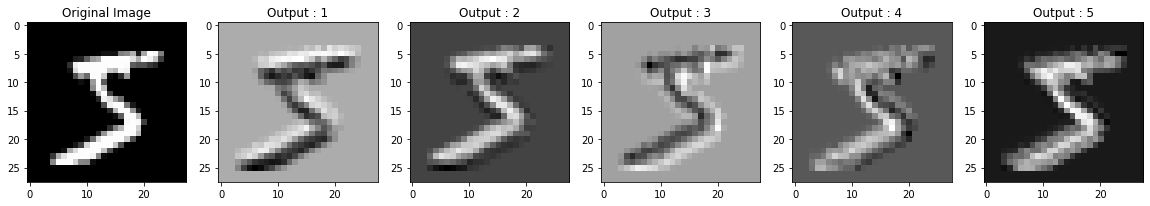

In [ ]:
# MNIST 이미지 5에 대한 Conv 레이어 통과 후 시각화

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1: ]):
  ax.set_title("Output : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

# Filter 시각화 하기
* CNN에서 Filter의 역할은 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기 한다.
* keras의 레이어들은 `get_weights()` 함수를 이용해서 편향과 가중치 등을 볼 수 있다.

In [ ]:
# 케라스의 모든 계산 가능한 레이어에서 매개변수 뽑아내기( 가중치, 편향 )
# layer - Conv2D 레이어의 필터 모양 : ( 3, 3, 1, 5 ) - ( 필터 세로, 필터 가로, 필터의 채널 수, 필터의 개수 )
weights = layer.get_weights()

In [ ]:
print("가중치의 형상 : {}".format(weights[0].shape))
print("편향의 형상 : {}".format(weights[1].shape))

가중치의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


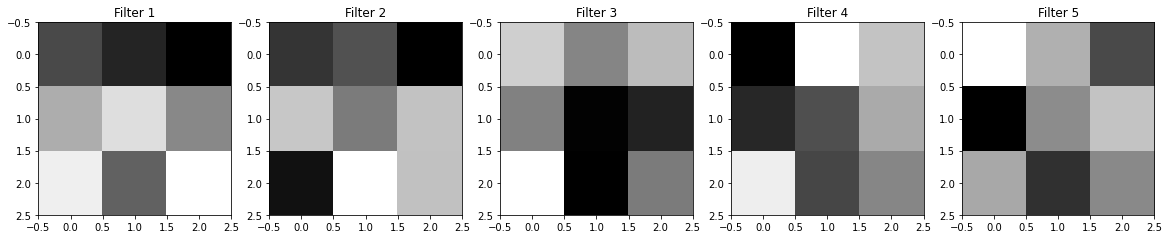

In [ ]:
# 시각화
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')
  
plt.show()

# ReLU 레이어 시각화
* 이미지 분석에서 ReLU가 자주 사용된다.
* 이미지 데이터에서 음수 데이터는 필요가 없는 데이터이다.
  * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 사용

In [ ]:
np.min(output), np.max(output)

(-200.86574, 208.96964)

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # Conv 결과를 활성화 레이어에 집어 넣는다.
act_output.shape